In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [37]:
#extract columns from data
extr_cols = ['distance','crs_elapsed_time','actual_elapsed_time']

In [19]:
#loading data
df = pd.read_csv('data/Final_Table_2.csv')


In [39]:
avail_df = df[extr_cols]

In [40]:
avail_df.head(5)

,distance,crs_elapsed_time,actual_elapsed_time
0,1130,160,153.0
1,302,75,69.0
2,551,100,86.0
3,1903,290,283.0
4,604,105,125.0


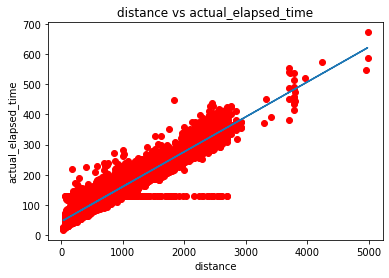

In [33]:
#plotting Liear regression line to show liear relationship between distance and 'actual_elapsed_time'
m, b = np.polyfit(avail_df['distance'], avail_df['actual_elapsed_time'], 1)
plt.scatter(avail_df['distance'], avail_df['actual_elapsed_time'], color = "red")
plt.plot(df['distance'], m*df['distance']+b)
plt.title("distance vs actual_elapsed_time")
plt.xlabel("distance")
plt.ylabel("actual_elapsed_time")
plt.show()

In [43]:
#extract X,y for train and testing data
X = avail_df.drop(columns = ['actual_elapsed_time'])
y = df['actual_elapsed_time']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20, random_state=42)

In [44]:
X.columns

Index(['distance', 'crs_elapsed_time'], dtype='object')

In [35]:
# setting the base estimators as the base models and final estimator with a linear regression with 5 cross folds.

# using different models to compare the accuracy power
base_models = [
    ('Linear Regression',LinearRegression()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ]
stacked = StackingRegressor(
    estimators = [
                    ('Linear Regression',LinearRegression()),
                    ('SVR',SVR()),
                    ('Random Forest',RandomForestRegressor()),
                ],
    final_estimator = LinearRegression(),
    cv = 5)

In [36]:
# Base Model 
for name, model in base_models:
    start_time = time.time()
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    end_time = time.time()
    
    r2 = model.score(X_test, y_test)
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
start_time = time.time()

# Stacked Model 
start_time = time.time()
stacked.fit(X_train, y_train)    
stacked_prediction = stacked.predict(X_test)
end_time = time.time()
stacked_r2 = stacked.score(X_test, y_test)
stacked_rmse = mean_squared_error(y_test, stacked_prediction, squared = False)
print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")

#stacked model using, Liear, SVR, Random Forest, and final decision: Liear Regression
#able to acchieve 0.02% higher score compare to Liear Model

#but its worth to mention that, cost-realatings will increase significantly, as time performance increases from 0.006s to 28.47
#therefore I will choose Liear to predict actual_elapsed_time feature

-------Linear Regression-------
Coefficient of determination: 0.948120852887921
Computation Time: 0.006748199462890625
----------------------------------

-------SVR-------
Coefficient of determination: 0.8750943657482511
Computation Time: 3.518834352493286
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.931540676441217
Computation Time: 0.8914291858673096
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.9501080600618086
Computation Time: 28.472004175186157
----------------------------------


In [42]:
# Fit the model on training set
import pickle
model = LinearRegression()
model.fit(X_train, y_train)
# save the model to disk, using 'distance', 'crs_elapsed_time' to predict
filename = 'pred_actual_elapsed_time_model.sav'
pickle.dump(model, open(filename, 'wb'))
 